In [114]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('winequality-red.csv',sep=';')

df.head()

df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [115]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 6 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [116]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [117]:
# See proportion of good vs bad wines
df['goodquality'].value_counts()

1    855
0    744
Name: goodquality, dtype: int64

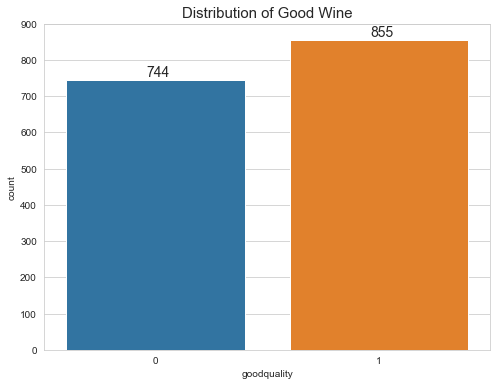

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title('Distribution of Good Wine', size=15)
sns.countplot(x=df['goodquality'])
target_count = df.goodquality.value_counts()
plt.annotate(text=target_count[0], xy=(-0.04,10+target_count[0]), size=14)
plt.annotate(text=target_count[1], xy=(0.96,10+target_count[1]), size=14)
plt.ylim(0,900)
plt.show()

In [119]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


In [120]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [121]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [122]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.03570115,  1.17013908, -0.82797173, ..., -0.77068411,
         0.91195248, -0.75660071],
       [-0.42519441, -0.54734879,  0.09751438, ...,  0.59078753,
        -0.10608706, -0.85048089],
       [ 0.03570115,  0.16145573, -1.18788299, ..., -0.57618817,
        -1.2372421 , -0.75660071],
       ...,
       [-0.25235857,  0.21597915,  0.20034617, ..., -0.12236428,
         0.1767017 , -0.85048089],
       [ 2.68585058, -0.32925509,  1.12583228, ..., -0.0575323 ,
         0.12014395,  2.15368509],
       [ 0.84226836,  2.45143956,  0.25176207, ..., -0.38169222,
        -1.01101109, -0.94436108]])

In [146]:
from sklearn.neighbors import KNeighborsClassifier
best_accuracy = 0
for k in range(1,70):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_score = knn.score(X_train,y_train)
    if train_score > best_accuracy:
        best_accuracy = train_score
        best_k = k
    print(f"Precent of accuracy on training data using k={k} is {100 * knn.score (X_train,y_train)}")
print(f'Best accuracy found with k={best_k}')

Precent of accuracy on training data using k=1 is 100.0
Precent of accuracy on training data using k=2 is 87.65638031693076
Precent of accuracy on training data using k=3 is 86.07172643869892
Precent of accuracy on training data using k=4 is 82.98582151793161
Precent of accuracy on training data using k=5 is 82.40200166805671
Precent of accuracy on training data using k=6 is 80.98415346121767
Precent of accuracy on training data using k=7 is 79.81651376146789
Precent of accuracy on training data using k=8 is 79.8999165971643
Precent of accuracy on training data using k=9 is 79.06588824020017
Precent of accuracy on training data using k=10 is 78.73227689741451
Precent of accuracy on training data using k=11 is 78.31526271893244
Precent of accuracy on training data using k=12 is 77.73144286905755
Precent of accuracy on training data using k=13 is 77.31442869057548
Precent of accuracy on training data using k=14 is 78.14845704753962
Precent of accuracy on training data using k=15 is 77.73

In [157]:
knn = KNeighborsClassifier(n_neighbors=75)
knn.fit(X_train,y_train)
test_score_knn = knn.score(X_test,y_test)
print(f'accuracy is {round(100*test_score_knn,2)}%')

accuracy is 74.0%


[0.684375   0.690625   0.7125     0.721875   0.65830721]
0.6935364420062696


Text(0, 0.5, 'Cross-Validated Accuracy')

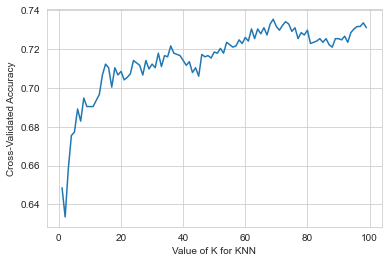

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

k_range = range(1,100)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')



In [158]:
y_pred = np.array(knn.predict(X_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred Negative", "Pred Positive"],
                        index=['True Negative', "True Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 3)
precision = round((tp)/(tp+fp),3)
recall = round((tp)/(tp+fn),4)
f1 = round(f1_score(y_test,y_pred),3)
print(conf_mat)
print(f'\n Accuracy =', accuracy)
print(f'\n Precision =', precision)
print(f'\n Recall =', recall)
print(f'\n F1 Score =', f1)

               Pred Negative  Pred Positive
True Negative            122             63
True Positive             41            174

 Accuracy = 0.74

 Precision = 0.734

 Recall = 0.8093

 F1 Score = 0.77


In [125]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver ='lbfgs', max_iter=20 )
lr.fit(X_train, y_train) 
test_score =  lr.score (X_test,y_test)*100
test_score = round(test_score,2) 
print ("accuracy on test data using Logisitic Regression is ",test_score)

accuracy on test data using Logisitic Regression is  75.25


In [159]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)


GaussianNB()

In [162]:
y_pred = np.array(nb.predict(X_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred Negative", "Pred Positive"],
                        index=['True Negative', "True Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 3)
precision = round((tp)/(tp+fp),3)
recall = round((tp)/(tp+fn),4)
f1 = round(f1_score(y_test,y_pred),3)
print(conf_mat)
print(f'\n Accuracy =', accuracy)
print(f'\n Precision =', precision)
print(f'\n Recall =', recall)
print(f'\n F1 Score =', f1)

               Pred Negative  Pred Positive
True Negative            129             56
True Positive             49            166

 Accuracy = 0.738

 Precision = 0.748

 Recall = 0.7721

 F1 Score = 0.76


In [160]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))

In [161]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, shuffle=True)
    cv_result = cross_val_score(model,X_train,y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Logistic Regression: 73.81162464985994
Naive Bayes: 73.06022408963585
K-Nearest Neighbour: 73.56162464985995


In [132]:
from sklearn.metrics import classification_report, confusion_matrix 
import numpy as np
from sklearn.metrics import f1_score

lr_predictions = lr.predict(X_test)
nb_predictions = nb.predict(X_test)
knn_predictions = knn.predict(X_test)

y_pred = np.array(lr.predict(X_test))
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred),
                        columns=["Pred Negative", "Pred Positive"],
                        index=['True Negative', "True Positive"])
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
accuracy = round((tn+tp)/(tn+fp+fn+tp), 3)
precision = round((tp)/(tp+fp),3)
recall = round((tp)/(tp+fn),4)
f1 = round(f1_score(y_test,y_pred),3)
print(conf_mat)
print(f'\n Accuracy =', accuracy)
print(f'\n Precision =', precision)
print(f'\n Recall =', recall)
print(f'\n F1 Score =', f1)

print('Logistic Regression\n',classification_report(y_test,lr_predictions))

print('Gaussian NB\n',classification_report(y_test,nb_predictions))

print('KNN\n',classification_report(y_test,knn_predictions))


               Pred Negative  Pred Positive
True Negative            134             51
True Positive             48            167

 Accuracy = 0.752

 Precision = 0.766

 Recall = 0.7767

 F1 Score = 0.771
Logistic Regression
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       185
           1       0.77      0.78      0.77       215

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400

Gaussian NB
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       185
           1       0.75      0.77      0.76       215

    accuracy                           0.74       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.74      0.74      0.74       400

KNN
               precision    recall  f1-score   support

           0       0.74      0.68      0.71 

In [102]:
report_lr = classification_report(y_test,lr_predictions , output_dict=True)
report_nb = classification_report(y_test,nb_predictions , output_dict=True)
report_knn = classification_report(y_test,knn_predictions , output_dict=True)

In [163]:
model = {'Model':['Logistic Regression', 'Gaussian Naive Bayes', 'K Nearest Neighbors'],
        'Accuracy':[report_lr['accuracy'],report_nb['accuracy'],report_knn['accuracy']],
        'Precision':[report_lr['weighted avg']['precision'],report_nb['weighted avg']['precision'],report_knn['weighted avg']['precision']],
        'Recall':[report_lr['weighted avg']['recall'],report_nb['weighted avg']['recall'],report_knn['weighted avg']['recall']],
        'F1-Score':[report_lr['weighted avg']['f1-score'],report_nb['weighted avg']['f1-score'],report_knn['weighted avg']['f1-score']]}

model = pd.DataFrame(model)

model.round(3).sort_values(by=['Accuracy'],ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.752,0.752,0.752,0.752
2,K Nearest Neighbors,0.740,0.740,0.740,0.739
1,Gaussian Naive Bayes,0.738,0.737,0.738,0.737
